In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm


In [164]:
E = 10
T = 0.5
r = 0.05
sigma = 0.2
S1 = 2
S2 = 16
a = np.log(S1 / E)
b = np.log(S2 / E)
M = 80
Mb = math.trunc(M * (b / -a))
h = (-a) / M #Paso del tiempo
N = 50
k = T / N #Paso de espacio
alpha = k * (sigma ** 2) / (2 * h ** 2)
alpha

0.4941530891573725

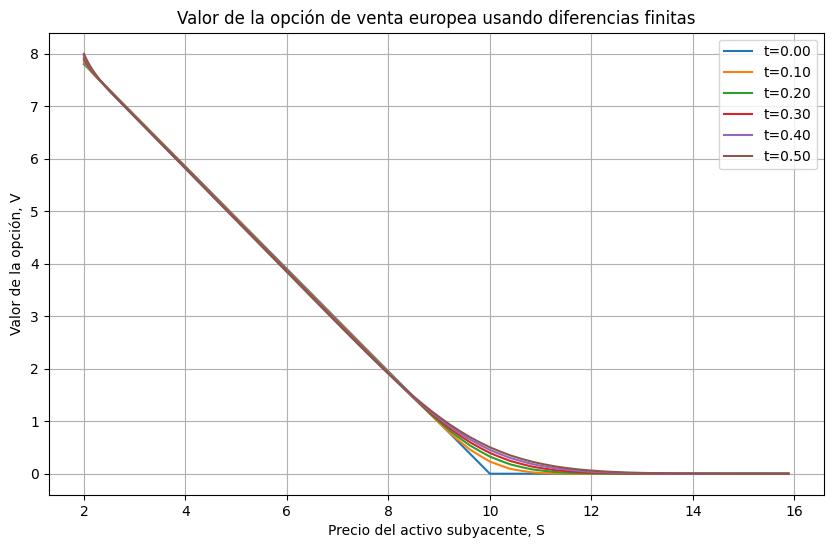

In [165]:
# Definimos los vectores y matrices que usaremos
V = np.zeros((M + Mb + 1, N + 1))
x = np.zeros(M + Mb + 1)

# Aplicamos una transformación
for i in range(M + Mb + 1):
    x[i] = a + (i * h)
    
    
# Calculamos la condición inicial
for i in range(M + Mb + 1):
    V[i, 0] = np.maximum(0, (E - E * np.exp(x[i]))*np.exp(-r * (T)) )
    
    
# Calculamos las condiciones de frontera
for i in range(N + 1):
    V[0, i] = (E - S1) * np.exp(-r * (T - i * k))
    V[-1, i] = 0


# Calculamos el resto de la EDP
for i in range(1, N + 1):
    for j in range(1, M + Mb):
        V[j, i] = alpha * V[j - 1, i - 1] + (1 - 2 * alpha) * V[j, i - 1] + alpha * V[j + 1, i - 1]


#Printamos la evolucion de la edp
S = E*np.exp(x)

# Graficar los resultados
plt.figure(figsize=(10, 6))
for i in range(0, N+1, int(N/5)):
    plt.plot(S, V[:, i], label=f't={i*k:.2f}')
plt.xlabel('Precio del activo subyacente, S')
plt.ylabel('Valor de la opción, V')
plt.legend()
plt.title('Valor de la opción de venta europea usando diferencias finitas')
plt.grid(True)
plt.show()

In [166]:
#Mostramos los valores cercanos al precio de ejercicio
for i in range(M-10,M+10,2):
    print(S[i],V[i, N])   

8.177654339579425 1.7471020882062165
8.513399225207845 1.4587209689128904
8.862928580507484 1.1824152543171742
9.226808345905882 0.9263375159545206
9.605627697295935 0.6982245066344439
9.999999999999998 0.5040654517822347
10.410563801900299 0.3470022059390633
10.83798386734368 0.22682206623338597
11.282952253494754 0.14020763411429413
11.74618943088019 0.0816357126228286


In [171]:
def black_scholes_put(S, E, T, r, sigma):
    d1 = (np.log(S / E) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return E * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

# Parámetros
S1 = 8.177654339579425
S2 = 11.74618943088019
E = 10
T = 0.5
r = 0.05
sigma = 0.2

# Calcular el precio de la opción de venta usando la fórmula de Black-Scholes para S1 y S2
exact_solution_S1 = black_scholes_put(S1, E, T, r, sigma)
exact_solution_S2 = black_scholes_put(S2, E, T, r, sigma)

print("Solución exacta (Black-Scholes) para S1:", exact_solution_S1)
print("Solución exacta (Black-Scholes) para S2:", exact_solution_S2)

Solución exacta (Black-Scholes) para S1: 1.6397911185531147
Solución exacta (Black-Scholes) para S2: 0.06665580404734772


Esto significa que si el precio del activo subyacente es 8.177, entonces el valor de una opción de venta europea calculado utilizando el modelo de Black-Scholes es 1.6397911185531147. Y, si el precio del activo subyacente es 11.746, entonces el valor de una opción de venta europea calculado utilizando el modelo de Black-Scholes es 0.00010300076473458448.

**Errores absolutos del esquema de diferencias finitas explícitas**

- El error absoluto es |1.7471020882062165 - 1.6397911185531147| = 0.1073109696531018. (aprox 10^-1)
- El error absoluto es |0.0816357126228286 - 0.06665580404734772| = 0.014979908575480884. (aprox 10^-2)

Estos valores de error absoluto representan los errores absolutos entre las soluciones obtenidas mediante el esquema de diferencias finitas y las soluciones exactas del modelo de Black-Scholes para los precios de activo subyacente S1 = 8.177654339579425 y S2 = 11.74618943088019. Podemos observar que obtenemos errores absolutos pequeños. 

Ahora: Incrementamos x (para ganar precisión)

Resultado esperado: Un resultado sin sentido, un modelo con inestabilidad.

In [ ]:
E = 10
T = 0.5
r = 0.05
sigma = 0.2
S1 = 2
S2 = 16
a = np.log(S1 / E)
b = np.log(S2 / E)
M = 85
Mb = math.trunc(M * (b / -a))
h = (-a) / M
N = 50
k = T / N
alpha = k * (sigma ** 2) / (2 * h ** 2)
alpha

0.5578525108065651

Resultado sin sentido (inestabilidad), se presenta siempre que alpha > 1/2.

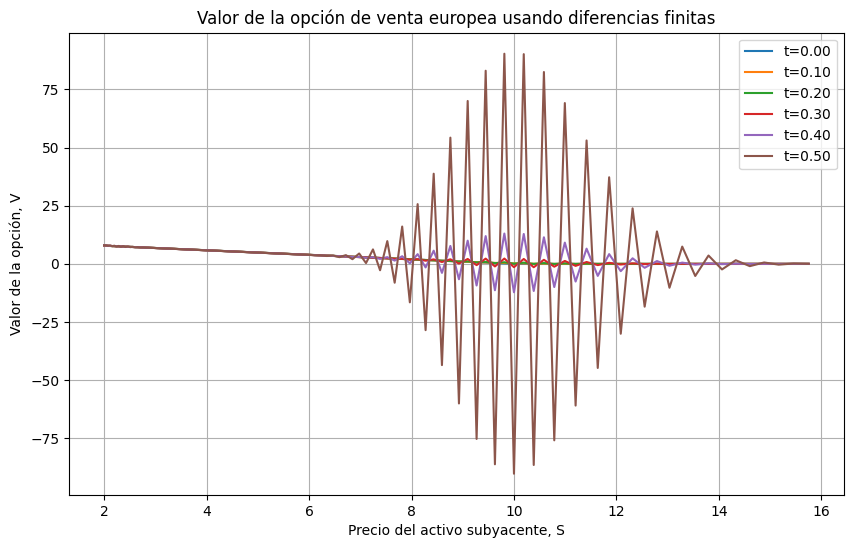

In [ ]:
# Definimos los vectores y matrices que usaremos
V = np.zeros((M + Mb + 1, N + 1))
x = np.zeros(M + Mb + 1)

# Aplicamos una transformación
for i in range(M + Mb + 1):
    x[i] = a + (i * h)
    
    
# Calculamos la condición inicial
for i in range(M + Mb + 1):
    V[i, 0] = np.maximum(0, (E - E * np.exp(x[i]))*np.exp(-r * (T)) )
    
    
# Calculamos las condiciones de frontera
for i in range(N + 1):
    V[0, i] = (E - S1) * np.exp(-r * (T - i * k))
    V[-1, i] = 0


# Calculamos el resto de la EDP
for i in range(1, N + 1):
    for j in range(1, M + Mb):
        V[j, i] = alpha * V[j - 1, i - 1] + (1 - 2 * alpha) * V[j, i - 1] + alpha * V[j + 1, i - 1]


#Printamos la evolucion de la edp
S = E*np.exp(x)

# Graficar los resultados
plt.figure(figsize=(10, 6))
for i in range(0, N+1, int(N/5)):
    plt.plot(S, V[:, i], label=f't={i*k:.2f}')
plt.xlabel('Precio del activo subyacente, S')
plt.ylabel('Valor de la opción, V')
plt.legend()
plt.title('Valor de la opción de venta europea usando diferencias finitas')
plt.grid(True)
plt.show()

In [ ]:
#Mostramos los valores cercanos al precio de ejercicio
for i in range(M-10,M+10,2):
    print(S[i],V[i, N])     

8.275004426910753 -28.4891159089264
8.594380707469703 -43.51765378408089
8.926083411474663 -60.0016402899618
9.27058828093973 -75.24772933606712
9.628389419284893 -86.14728480850818
10.0 -90.19802776114821
10.38595300265982 -86.44169613988916
10.786801977345856 -75.8429522007545
11.203121838571208 -60.90719803494101
11.635509689847247 -44.74143575718081


**Solución:** reducir el paso de tiempo, por ejemplo: Si M = 100 y N = 80

In [ ]:
E = 10
T = 0.5
r = 0.05
sigma = 0.2
S1 = 2
S2 = 16
a = np.log(S1 / E)
b = np.log(S2 / E)
M = 100
Mb = math.trunc(M * (b / -a))
h = (-a) / M
N = 80
k = T / N
alpha = k * (sigma ** 2) / (2 * h ** 2)
alpha


0.4825713761302466

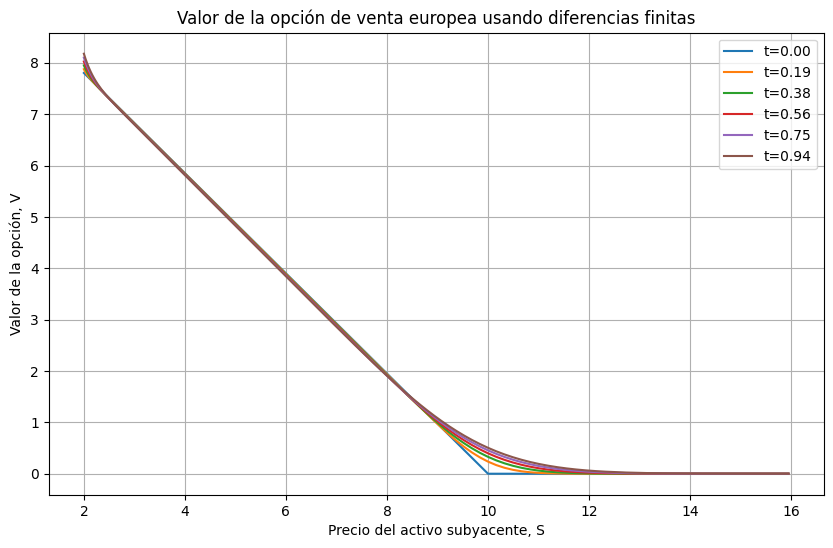

In [ ]:
# Definimos los vectores y matrices que usaremos
V = np.zeros((M + Mb + 1, N + 1))
x = np.zeros(M + Mb + 1)

# Aplicamos una transformación
for i in range(M + Mb + 1):
    x[i] = a + (i * h)

# Calculamos la condición inicial
for i in range(M + Mb + 1):
    V[i, 0] = np.maximum(0, (E - E * np.exp(x[i])) * np.exp(-r * (T)))

# Calculamos las condiciones de frontera
for i in range(N + 1):
    V[0, i] = (E - S1) * np.exp(-r * (T - i * k_ajustado))
    V[-1, i] = 0

# Calculamos el resto de la EDP
for i in range(1, N + 1):
    for j in range(1, M + Mb):
        V[j, i] = alpha * V[j - 1, i - 1] + (1 - 2 * alpha) * V[j, i - 1] + alpha * V[j + 1, i - 1]

# Graficar los resultados
S = E * np.exp(x)

plt.figure(figsize=(10, 6))
for i in range(0, N + 1, int(N / 5)):
    plt.plot(S, V[:, i], label=f't={i * k_ajustado:.2f}')
plt.xlabel('Precio del activo subyacente, S')
plt.ylabel('Valor de la opción, V')
plt.legend()
plt.title('Valor de la opción de venta europea usando diferencias finitas')
plt.grid(True)
plt.show()

**Conclusiones:**

 - Incrementar M significa que el tamaño del paso espacial h se reduce, lo cual ganaremos precisión, pero aumentamos el tiempo de cálculo.

 - Al reducir h, el valor de alpha (que depende de h) puede incrementarse si k se mantiene constante.

 - La condición de estabilidad requiere que alpha no exceda un cierto valor. Si se vuelve demasiado grande, el esquema explícito puede volverse inestable.

 - En definitiva, para mantener la estabilidad del esquema explícito, es crucial recalcular k de manera que alpha no exceda el límite permitido, típicamente alpha < 1/2
